# Hands-on experiment 2

## k-means Clustering with Semidefinite Programming

Clustering is an unsupervised machine learning problem in which we try to partition a given dataset into $k$ subsets based on distance between data points or similarity among them. The goal is to find $k$ centers and to assign each data point to one of the centers such that the sum of the square distances between them are minimal [1]. This problem is known to be NP-hard. 

#### Clustering problem
Given a set of $n$ points in a $d-$dimensional Euclidean space, denoted by
\begin{equation*}
S = \{ \mathbf{s}_i = (s_{i1}, \cdots, s_{id})^\top~\in \mathbb{R}^d ~~ i = 1, \cdots, n\}
\end{equation*}
find an assignment of the $n$ points into $k$ disjoint clusters $\mathcal{S} = (S_1, \cdots, S_k)$ whose centers are $\mathbf{c}_j(j = 1, \cdots, k)$ based on the total sum of squared Euclidean distances from each point $\mathbf{s}_i$ to its assigned cluster centroid $\mathbf{c}_i$, i.e.,
\begin{equation}
f(S,\mathcal{S}) = \sum_{j=1}^k\sum_{i=1}^{|S_j|}\|\mathbf{s}_i^{j} - \mathbf{c}_j \|^2,
\label{eq:cluster}\tag{Clustering Problem}
\end{equation}
where $|S_j|$ is the number of points in $S_j$, and $\mathbf{s}_i^{j} $ is the $i^{th}$ point in $S_j$.

#### Lloyd's algorithm for k-means



  **1.** Choose initial cluster centers $\mathbf{c}_1, \mathbf{c}_2, \cdots , \mathbf{c}_k$
  
  **2.** Repeat until convergence:
  $$\begin{cases}
  \text{Assignment step: }~~  \mathbf{s}_i ~~\text{belongs to cluster } j\text{, where} j := \text{argmin}_{j \in [1,k]} \|\mathbf{s}_i-\mathbf{c}_j\|   \\
  \text{Update each cluster center: }~~~~~~~~ \mathbf{c}_j = \frac 1{|S_j|} \sum_{i=1}^{|S_j|} \mathbf{s}_i^{j} \\
  \end{cases}$$


Note that the algorithm converges to local optimal points, so
\eqref{eq:cluster} can be arbitrarily bad depending on the
initialization of the cluster centers.

**SDP relaxation of the problem:** The work (Peng & Wei, 2007)
proposes an SDP-relaxation to approximately solve the aforementioned
model-free $k-$means clustering problem. The resulting optimization
problem (See section (2) of (Peng & Wei, 2007) for details of this
    relaxation and Lecture 13 for a brief introduction.) takes the standard semidefinite programming form

$$\mathbf{X}^\star \in \arg \min_{ \mathbf{X} } \bigg\{ \langle \boldsymbol{C}, \mathbf{X} \rangle : ~\underbrace{\mathbf{X} \mathbf{1} =  \mathbf{1}}_{A_1(\mathbf{X}) = b_1},\underbrace{~\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}}_{A_2(\mathbf{X}) = b_2},~\underbrace{\mathbf{X} \geq 0}_{B(\mathbf{X}) \in \mathcal{K}},~\underbrace{\mathrm{Tr}(\mathbf{X}) \leq \kappa, ~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X}\succeq 0 }_{\mathcal{X}} \bigg\},
\label{prob1}\tag{Problem 1}$$ 
where $C \in \mathbb{R}^{p \times p}$ is the
Euclidean distance matrix between the data points.
$\mathrm{Tr}(\mathbf{X}) \leq \kappa$ enforces approximately low-rank
solutions, the linear inclusion constraint $\mathbf{X} \geq 0$ is element-wise
nonnegativity of ${\mathbf{X}}$, the linear equality constraints
$\mathbf{X}\mathbf{1} = \mathbf{1}$ and $\mathbf{X}^{\top} \mathbf{1} = \mathbf{1}$
require row and column sums of $\mathbf{X}$ to be equal to 1's, and
$\mathbf{X} \succeq 0$ means that $\mathbf{X}$ is positive semi-definite. Recall that
$\mathrm{Tr}(\mathbf{X}) = \|\mathbf{X}\|_\ast$ for any positive semi-definite matrix
$\mathbf{X}$.

**Algorithm 1.** The SDP in \eqref{prob1} can be reformulated as $$
\min_{x \in \mathcal{X}}~~~ f(x) + g_1(A_1(x)) + g_2(A_2(x)) \qquad\text{subject to}\qquad B(x) \in \mathcal{K}, \label{prob2}\tag{Equation 2}$$ where $f(x) = \langle  \boldsymbol{C}, x \rangle$ is a
smooth convex function, $g_1=\delta_{\{b_1\}}(\cdot)$ is the indicator
function of singleton $\{b_1\}$, $g_2=\delta_{\{b_2\}}(\cdot)$ is the
indicator function of singleton $\{b_2\}$ and ${\mathcal{K}}$ is the
positive orthant for which computing the projection is easy.

Note that the classical Frank-Wolfe method does not apply to this
problem due to nonsmooth terms $g_1, g_2$. In the sequel, we will
attempt to solve this problem with the HomotopyCGM method proposed in
(Yurtsever et al., 2018) to handle the non-smooth problems with a
conditional gradient based method.


**Algorithm 2.** Another option for solving this problem is Vu-Condat
method we have seen in Lecture 12. For solving the problem
$ \begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}$ where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$. In particular, define $$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$ and $$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$
Vu-Condat algorithm iterates as follows (recall that $g^\ast$ denotes
the conjugate function of $g$):


## 2.1 Theory

#### Questions 2.1.1 (5 pts) Characterizing the domain

Show that the domain $\mathcal{X} = \{\mathbf{X}: \mathrm{Tr}(\mathbf{X}) \leq \kappa,~\mathbf{X} \in \mathbb{C}^{p\times p} ,~\mathbf{X} \succeq 0\}$ is a convex set. For this purpose, apply the definition of set convexity.


**Ans.)**

To show that $\mathcal{X}$ is a convex set we consider the matrix $ M = tX_1 + (1-t)X_2 \in \mathcal{X}$ where $X_1,X_2\in \mathcal{X}$ and $t\in[0,1]$

$Tr(M) = t Tr(X_1) + (1-t)Tr(X_2) \leq \kappa$

$ M \in \mathbb{C}^{p\times p}$ since it is a linear combination of $X_1,X_2$

$ M \succeq 0$ because it is a linear combination of two positive definite matrices $X_1, X_2$

Since M satisfies all conditions of $\mathcal{X}$ we have that $M \in \mathcal{X}$ and $\mathcal{X}$ is a convex set.

#### Question 2.1.2  (10 pts) Gradient of the penalized objective

Given a linear inclusion constraint $Tx \in \mathcal{Y}$,
the corresponding quadratic penalty function is given by
$$\text{QP}_\mathcal{Y}(x) = \text{dist}^2(Tx, \mathcal{Y}) = \min_{y \in \mathcal{Y}} \| y-Tx\|^2.$$
Write down the constraints in (Equation 2) in
the quadratic penalty form and **show that** the penalized objective
takes the form
$$%\min_{x \in \mathcal{X}}  f(x) + g_{\beta} (A(x)) + h_{\beta} (B(x))  = 
f(x) + \frac{1}{2\beta} \|A_1(x) - b_1\|^2 + \frac{1}{2\beta} \|A_2(x) - b_2\|^2 + \frac{1}{2\beta}\text{dist}^2(x, \mathcal{K}),\tag{Equation 3}$$
and **show that** the gradient of the penalized objective is equal
to ${v_k/}{\beta}$ in the algorithm.\
(Hint: You can write
$\text{dist}^2(Tx, \mathcal{Y}) = \| y^\ast - Tx \|^2$, where
$y^\ast = \arg \min _{y\in \mathcal{Y}} \| y - Tx \|^2$. and take
the derivative with respect to $\mathbf{X}$ without worrying about
$y^\ast$ depending on $\mathbf{X}$, thanks to Danskin's theorem
(*cf.*, Lecture 10).)






<font color=‘blue’>
    
From the constraints given in Equation 2 given by 
$$
A_1(x) = b_1,\\ A_2(x) = b_2,\\ X \geq 0
$$ 

we observe that $A_1(x), A_2(x)$ are constrained to singletons $\{b_1\}, \{b_2\}$ respectively and X can only contain positive elements.
    
For these constaints we get the following quadratic penalty forms.
    
$$
\begin{aligned}
\text{QP}_{\{b_1\}}(x) &= \text{dist}^2(A_1(x), \{b_1\}) = \min_{y \in \{b_1\}} \| y-A_1(x)\|^2 =  \| b_1-A_1(x)\|^2 \\ 
\text{QP}_{\{b_2\}}(x) &= \text{dist}^2(A_2(x), \{b_2\}) = \min_{y \in \{b_2\}} \| y-A_1(x)\|^2 =  \| b_2-A_2(x)\|^2 \\ 
\text{QP}_{\mathcal{K}}(x) &= \text{dist}^2(x, \mathcal{K}) = \min_{y \in \mathcal{K}} \| y-x\|^2 =  \|\mathrm{proj}_{\mathcal{K}}(x) -x\|^2 \\ 
\end{aligned}
$$

Having calculated the quadratic penalty form of the constaints, we can introduce these penalties in the objective function to account for the constrains and also introduce a term $1/(2*\beta)$ that controls the contribution of the constraints to the objective function.
    
By replacing the constraints with the quadratic penalties in the objective function we get the following penalized objective function:
    
$$
Obj_{penalized} = f(x) + \frac{1}{2\beta} \left(\|A_1(x) - b_1\|^2 +  \|A_2(x) - b_2\|^2 + \text{dist}^2(x, \mathcal{K})\right)
$$

Thus we have computed the expression for the penalized objective function. Now to calculate the gradient to get the expreesion :

$$
\begin{aligned}
\nabla Obj_{penalized} &= \nabla \left(f(x) + \frac{1}{2\beta} \left(\|A_1(x) - b_1\|^2 +  \|A_2(x) - b_2\|^2 + \|x^* -x\|^2\right)\right) \\ 
&= \nabla f(x) + \frac{1}{\beta} \left(A_1^\top(A_1(x) - b_1) + A_2^\top(A_2(x) - b_2) + (x - x^*)\right) \\ 
&= \frac{v_k}{\beta} 
\end{aligned}
$$
    
where $v_k = \beta \nabla f(x_k) + A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))$ and $x^* = \text{proj}_{\mathcal{K}}(x_k)$ which is treated as independent of x while computing the gradient using Danskin's theorem.

#### Question 2.1.3 (5 pts) 

Write down $v_k$ explicitly by deriving the gradient and projection specific to (Equation 2)



<font color=‘blue’>

In the solution of question 2.1.2,  we have computed the value for $v_k$ by computing the gradient for the penalized objective function we got specific to Equation 2. We get the following expression for $v_k$:
    
$$
v_k = \beta \nabla f(x_k) + A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))
$$

#### Question 2.1.4 (5 pts) 

Using the definitions we used for $g$ and $A$
in (Definition of A)
and (Definition of g), show that the $y^{k+1}$ update step of
Vu-Condat can be written in the form
$$y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix},$$
and
$$A^\top y^{k+1} = A^\top y^k + \sigma (A_1^\top(A_1 (\tilde x^{k+1}) - b_1) + A_2^\top (A_2 (\tilde x^{k+1}) - b_2) + \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + \tilde x^{k+1})),$$
where the vector $y$ in the dual domain can be written in the form
$y = [y_1~,~y_2~,~y_3]^\top$ with $y_1, y_2\in\mathbb{R}^p$ and
$y_3 \in\mathbb{R}^{p^2}$ (see
also (Definition of A)).

**Hint**: Use Moreau's decomposition to write the update using
$\mathrm{prox}_{g}$ instead of $\mathrm{prox}_{g^\ast}$. In
particular
$$y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1})) \\
%&= y^k + \sigma (A_1\tilde x^{k+1} + A_2\tilde x^{k+1} + \tilde x^{k+1}) - \sigma (b_1+b_2+\mathrm{proj}_\mathcal{K}(\sigma^{-1}y^k + \tilde x^{k+1}))$$
The remaining steps are to
use (Definition of A) and find how to compute
$\mathrm{prox}_{g}$ when $g$ is in the decomposed form given
in (Definition of g).

<font color=‘blue’>
Ans.)


Using the Moreau's decomposition we can re-write the Vu-Condat algorithms update step for $y_{k+1}$ as follows - 
    
$$
y^{k+1} = \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\tilde x^{k+1})) = y^k + \sigma A( \tilde x^{k+1}) - \sigma \mathrm{prox}_{\sigma^{-1} g}(\sigma^{-1}y^k + A(\tilde x^{k+1}))
$$
    
Using the definition of A, the update is given by:

$$
y^{k+1} = y^k + \sigma \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1}  \end{bmatrix} - \sigma \mathrm{prox}_{\sigma^{-1} g} \left (\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1}  \end{bmatrix} \right )
$$
    
Computing the proximal operator part of the expression using the Definition of g:
    
$$
\begin{aligned}
\mathrm{prox}_{\sigma^{-1} g} \left (\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1}  \end{bmatrix} \right ) &= \mathop{\mathrm{arg\,min}}\limits_{z}\left( g(z) + \frac{1}{2\sigma^{-1}}\|z - \left (\sigma^{-1}y^k + \begin{bmatrix} A_1\tilde x^{k+1} \\ A_2\tilde x^{k+1} \\ \tilde x^{k+1}  \end{bmatrix} \right )\|_F^2 \right )\\
&= \mathop{\mathrm{arg\,min}}\limits_{z}\left( \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3) + \frac{\sigma}{2}\|\begin{bmatrix} z_1 - \sigma^{-1}y_1^k -  A_1\tilde x^{k+1}\\ z_2 - \sigma^{-1}y_2^k -  A_2\tilde x^{k+1}\\ z_3- \sigma^{-1}y_3^k - x^{k+1} \end{bmatrix}\|_F^2 \right )\\
&= \begin{bmatrix} b_1\\ b_2\\ \mathop{\mathrm{arg\,min}}\limits_{z_3\in \mathcal{K}}\|z_3- (\sigma^{-1}y_3^k + x^{k+1})\|_F^2 \end{bmatrix} \\
&= \begin{bmatrix} b_1\\ b_2\\ \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + \tilde x^{k+1}))\end{bmatrix}
\end{aligned}
$$
    
In the above expression we have 3 indicator functions for each component $z_1,z_2,z_3$. Due to this, each component attains the value to minimize the indicator i.e. $z_1=b_1, z_2=b_2,$ and $z_3 \in \mathcal{K}$ and $z_3 = \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + \tilde x^{k+1}))$.
    
Substituting the expression for the proximal operator in the update step we get:

$$
y^{k+1} := \begin{bmatrix} y_1^{k+1} \\ y_2^{k+1} \\ y_3^{k+1} \end{bmatrix} = \begin{bmatrix} y_1^k \\ y_2^k \\ y_3^k \end{bmatrix} +\sigma \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix},$$
    
On applying $A^\top$ on $y^{k+1}$ we get:
    
$$
A^\top y^{k+1} =  A^\top y^{k} + \sigma A^\top  \begin{bmatrix} A_1\tilde x^{k+1} - b_1 \\ A_2\tilde x^{k+1} - b_2 \\ \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y_3^k + \tilde x^{k+1}) \end{bmatrix} = A^\top y^k + \sigma (A_1^\top(A_1 (\tilde x^{k+1}) - b_1) + A_2^\top (A_2 (\tilde x^{k+1}) - b_2) + \tilde x^{k+1} - \mathrm{proj}_{\mathcal{K}}(\sigma^{-1}y^k_3 + \tilde x^{k+1}))
$$

## 2.2 Practice

In [2]:
from lib.part2.helpers import *
from lib.part2.Llyod_kmeans import *

### Define operators
We provide 2 operators and their conjugates:
1. `A1`: Linear operator that takes the row sums
2. `At2`: Conjugate of operator A1
3. `A2`: Linear operator that takes the column sums 
4. `At2`: Conjugate of operator A2

### Algorithm 1. Homotopy CGM

You will first implement Homotopy CGM which is defined below for the problem specified in (Equation 2).

  #### Homotopy Conditional Gradient Method (HCGM)
  ---------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}$ and $\beta_0 >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$
  \begin{cases}
  \gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 / \sqrt{k+1} \\
  v_k &= \beta_k \nabla f(x_k) + A_1^\top (A_1(x_k) - b_1) + A_2^\top (A_2(x_k) - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))\\
  \hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}
  $$
  
  **3.** Output:$~x^{k+1}$
  
  ---------------------------------------------------------------------------------------------------------------------------------

HCGM is designed for solving constrained minimization problems of the form in (Equation 2). We define such a constrained problem in the following cell, where we specify an objective $f$ and a set of penalities $\{g_i\}$.


#### Question 2.2.0 (2 pts)

Fill in the missing parts.

In [3]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X: C
)

g1 = Function(
    f = lambda X : np.linalg.norm((A1(X) - b))**2,
    grad = lambda X: 2*At1(A1(X) - b)
)

g2 = Function(
    f = lambda X : np.linalg.norm((A2(X) - b))**2,
    grad = lambda X: 2*At2(A2(X) - b)
)

g3 = Function(
    f = lambda X : np.sqrt(np.sum(np.minimum(X,0)**2)),
    grad = lambda X: 1000*(X -  np.where(X > 0, X, 0)) # <-- fill in (x_k - proj_K(x_k))
)

p = ConstrainedProblem(f = f, penalties = [g1, g2, g3])


**Remark**: The 1000 factor in the term for $(x_k - \text{proj}_{\mathcal{K}}(x_k))$ in Algorithm 1 is in order to obtain a better practical convergence. This basically corresponds to having different penalty parameters for different constraints.

#### Question 2.2.1 (4 pts)

Complete the missing lines in the function
definitions of `HCGM`, which implements Homotopy CGM.

First implement the LMO. Note that here we have symmetric real matrices. Therefore, you can use `eigsh` from `scipy.sparse.linalg` instead of `svds` which is already imported.

In [56]:
def lmo(grad, kappa):
    
    # Find the lowest eigenvalue and eigenvector
    w, v = eigsh(grad, k=1, which = 'SA')
    
    # when the lowest eigenvalue of Grad is negative then we construct X using kappa and the eigenvector corresponging to the lowest eigenvector
    if w < 0:
    
        Zhat = kappa * v @ v.T
    
    # since Grad is positive definite, lmo is the zero matrix because we cannot minimize <X, Grad> any further than that
    else : 
        
        Zhat = np.zeros(np.shape(grad))
    
    return Zhat

In [5]:
@dataclass
class HCGM_state(OptState):
    x_k: Matrix
    k: int
    beta0: float

In [6]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

For the update recall that a `ConstrainedProblem` can be unpacked as follows:

- `f` which is a `Function` that has a `grad` method
- `penalties` which is a list of functions each having a `grad` method

In [7]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    f, penalties = p
    x_k, k, beta0 = state
    
    gamma_k = 2/(k+1)
    beta_k = beta0/np.sqrt(k+1)
    
    v_k = beta_k*f.grad(x_k) + penalties[0].grad(x_k) + penalties[1].grad(x_k) + penalties[2].grad(x_k)
    
    X_bar = lmo(v_k, kappa)
    
    X_next = (1-gamma_k)*x_k + gamma_k*X_bar
    
    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [8]:
HCGM = OptAlgorithm(name="HCGM", init_state = HCGM_initialize, state_update = HCGM_update)

#### Question 2.2.2 (1 pts) Run HCGM

Run `HCGM` for $5000$-iterations and plot the result.

In [9]:
X_HCGM, f1_HCGM, f2_HCGM, f3_HCGM, obj_HCGM, iter_HCGM, time_HCGM = run_HCGM(HCGM, p, maxit=5000, beta0=1.0)

  0%|          | 0/5000 [00:00<?, ?it/s]

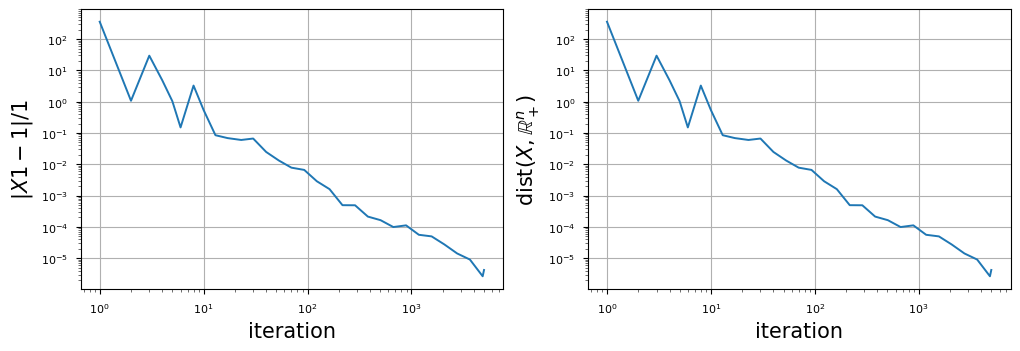

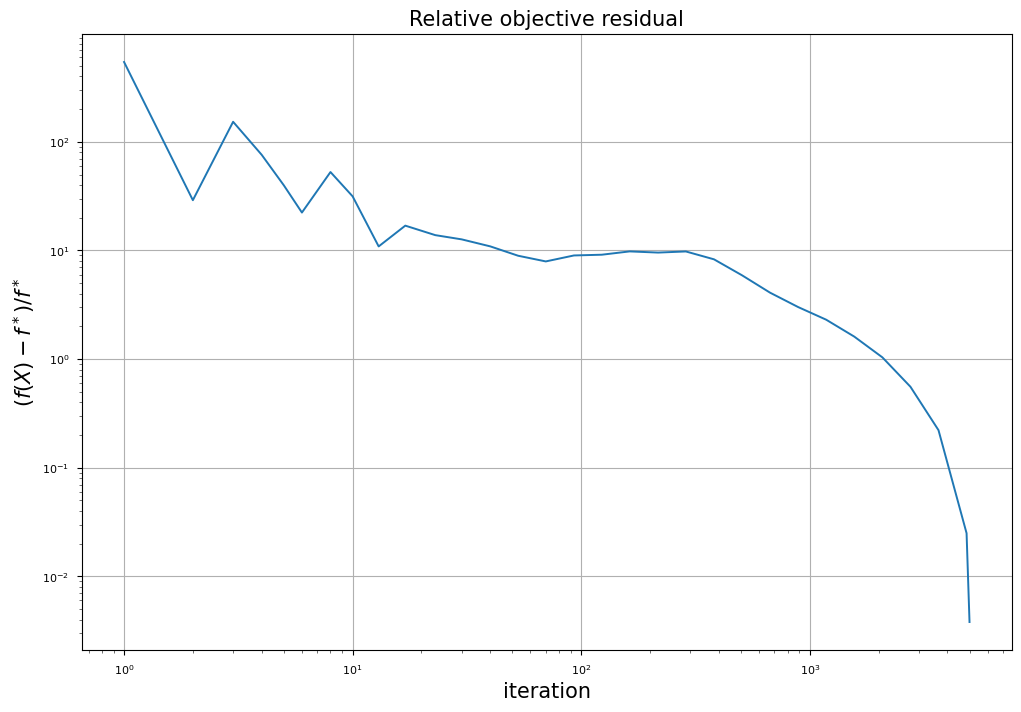

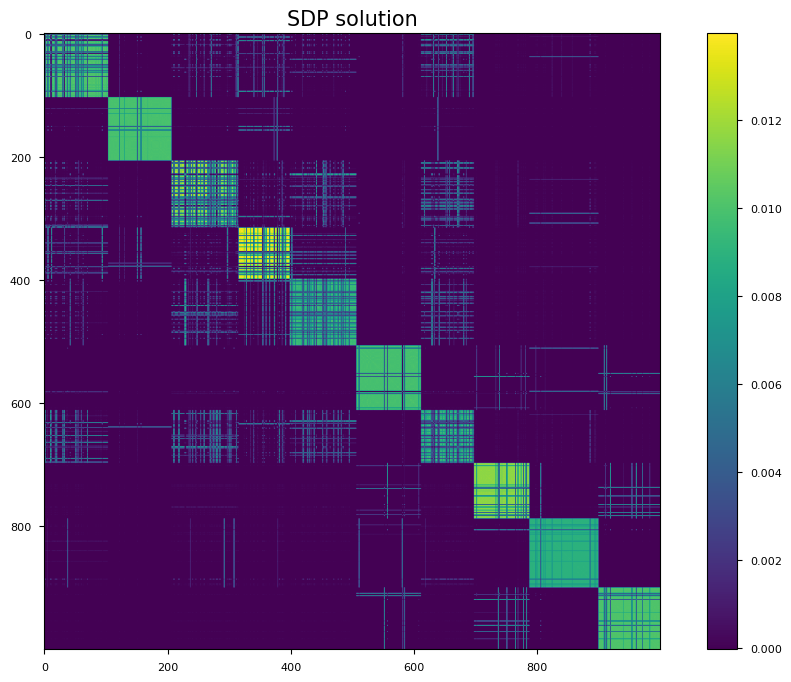

In [10]:
plot_func(iter_HCGM, f1_HCGM,f2_HCGM, obj_HCGM, X_HCGM, opt_val)

### Algorithm 2. Vu-Condat

Recall the Vu-Condat algorithm can be used to solve the problem
$$ \begin{equation} \min_x f(x) + g(A(x)) + h(x) \end{equation}$$ where,
$f(x) = \langle \boldsymbol{C}, x \rangle$ and
$h(x) = \delta_{\mathcal{X}}(x)$. Moreover,
$g(A(x)) = g_1(A_1 (x)) + g_2(A_2 (x)) + \delta_{\mathcal{K}}(Bx)$ for a
suitably defined $g$ and $A$. In particular, define $$\begin{aligned} 
z  = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = \begin{bmatrix}A_1x \\ A_2 x \\ Bx \end{bmatrix},~~~~~A = \begin{bmatrix} A_1 \\ A_2 \\ B \end{bmatrix}~~~~\Rightarrow~~~~~z= A(x),
\end{aligned}\tag{Definition of A}$$ and $$\tag{Definition of g}
g(z) = \delta_{\{b_1\}}(z_1) + \delta_{\{b_2\}}(z_2) + \delta_\mathcal{K}(z_3).$$

#### Question 2.2.3 (2 pts)

To implement Vu-Condat we need to specify the proximal operator of $h$ and $g^*$ as well as the linear operator $A$. We do so in the following cell. Note that the `DualVariable` class is created to keep track of all three dual variable $(y_1,y_2,y_3)$ in a concise way.
In the following cells fill in the proximal operators of $h$ and $g$.

**Hint**: Recall that the proximal operator of an indicator function is a projection. We give you `projSDP(X,kappa)` and (global variable) `kappa`, which projects onto $\mathcal X$. Further, the proximal operator of a seperable sum is a concatenation of the proximal operators of each term (see the lecture on proximal methods).

In [21]:
f = Function(
    f = lambda X : np.sum(C.flatten()*X.flatten()),
    grad = lambda X : C
)

h = Function(
    f = lambda X : 0 if (ispsd(X) and np.trace(X) <= kappa) else float('inf') ,
    prox = lambda tau, X: projSDP(X,kappa)
)

g = Function(
    f = lambda y: 0 if (y.y_1==b) and (y.y_2==b) and (np.all(y.y_3 >=0)) else float('inf'),
    prox = lambda sigma, y: DualVariable(b, b, np.where(y.y_3 > 0, y.y_3, 0))
)

def A(x):
    return DualVariable(A1(x), A2(x), x)

def A_T(y):
    return At1(y.y_1)+ At2(y.y_2)+ y.y_3

composite = (f, g, h, A, A_T)

With the problem formulation in place we can specify the Vu-Condat algorithm.

#### Vu-Condat method
  ------------------------------------------------------------------------------------------------------------------------------
  **1.** Choose $x^0 \in\mathcal{X}, y^0\in\mathbb{R}^{2p+p^2}$ and $\tau, \sigma >  0$
  
  **2.** For $k=1, 2, \ldots$ perform:
  $$\begin{cases}
  x^{k+1} &= \mathrm{prox}_{\tau h}(x^k - \tau (\nabla f(x^k) + A^\top y^k)) \\
  \bar x^{k+1} &= 2x^{k+1} - x^k \\
  y^{k+1} &= \mathrm{prox}_{\sigma g^\ast}(y^k + \sigma A(\bar x^{k+1}))
  %\gamma_k &= 2/(k+1), ~~\text{and}~~ \beta_k = \beta_0 / \sqrt{k+1} \\
  %v_k &= \beta_k \nabla f(x_k) + A_1^\top (A_1x_k - b_1) + A_2^\top (A_2x_k - b_2) + (x_k - \text{proj}_{\mathcal{K}}(x_k))\\
  %\hat{x}^k &:= \mathrm{argmin}_{x \in \mathcal{X}} \left \langle  v_k,  x \right \rangle \\
  %x^{k+1} &:= (1-\gamma_k)x^k + \gamma_k\hat{x}^k
  \end{cases}$$ 
  
  **3.Output: $~x^k$**
  
  ---------------------------------------------------------------------------------------------------------------------------------


#### Question 2.2.4 (4 pts)

Complete the missing lines in the function
definitions of `PDHG`, which implements the Vu-Condat method. 

**Remarks:** 

- In our case, we advise you to **multiply the step-size for $y_3$ by $10^4$** to obtain a better practical convergence. It is possible to use different dual step sizes, $\{ \sigma_1 , \sigma_2, \sigma_3 \}$.  Such a diagonal variable stepsize is supported through `[sigma1, sigma2, sigma3]*dual_variable`.
- The algorithm needs the proximal operator of $g^*$, the Fenchel dual of $g$, using the Moreau identity express the prox of $g^*$ in terms of the prox of $g$. You will need to multiply by the stepsize `Sigma` and its inverse `Sigma_inv` which we provide in the code below.

In [22]:
@dataclass
class PDHG_state(OptState):
    x_k: Matrix
    y_k: DualVariable(Vector, Vector, Matrix)
    tau: float
    sigma: float

In [23]:
def PDHG_initialize(composite, x_zero):
    L = 1e2
    tau = 1/L
    return PDHG_state(x_k = x_zero, y_k = A(x_zero), tau=tau, sigma=1/(L**2*tau))

def PDHG_update(composite, state):
    f, g, h, A, A_T = composite
    y_k = state.y_k
    x_k, _, tau, sigma = state
    
    next_x_k = h.prox(tau, x_k - tau*(f.grad(x_k)+ A_T(y_k)))

    x_bar = 2*next_x_k - x_k
    
    Sigma = [sigma, sigma, sigma*1e4]
    Sigma_inv = [1/sigma, 1/sigma, 1/(sigma*1e4)]
    
    y_kk = y_k + Sigma*A(x_bar)
    
    next_y_k = y_kk - Sigma*g.prox(Sigma, Sigma_inv* y_k + A(x_bar)) 
    
    return PDHG_state(next_x_k, next_y_k, tau, sigma)

In [24]:
PDHG = OptAlgorithm(name="PDHG", init_state = PDHG_initialize, state_update = PDHG_update)

#### Question 2.2.5 (1 pts) Run Vu-Condat

Run `PDHG` for $1000$-iterations and plot the result.

In [25]:
X_PDHG, f1_PDHG, f2_PDHG, obj_PDHG, iter_PDHG, time_PDHG = run_PDHG(PDHG, composite, maxit=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

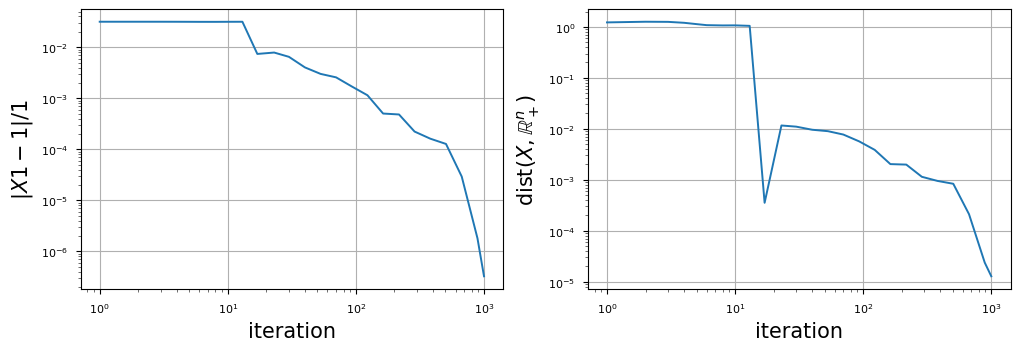

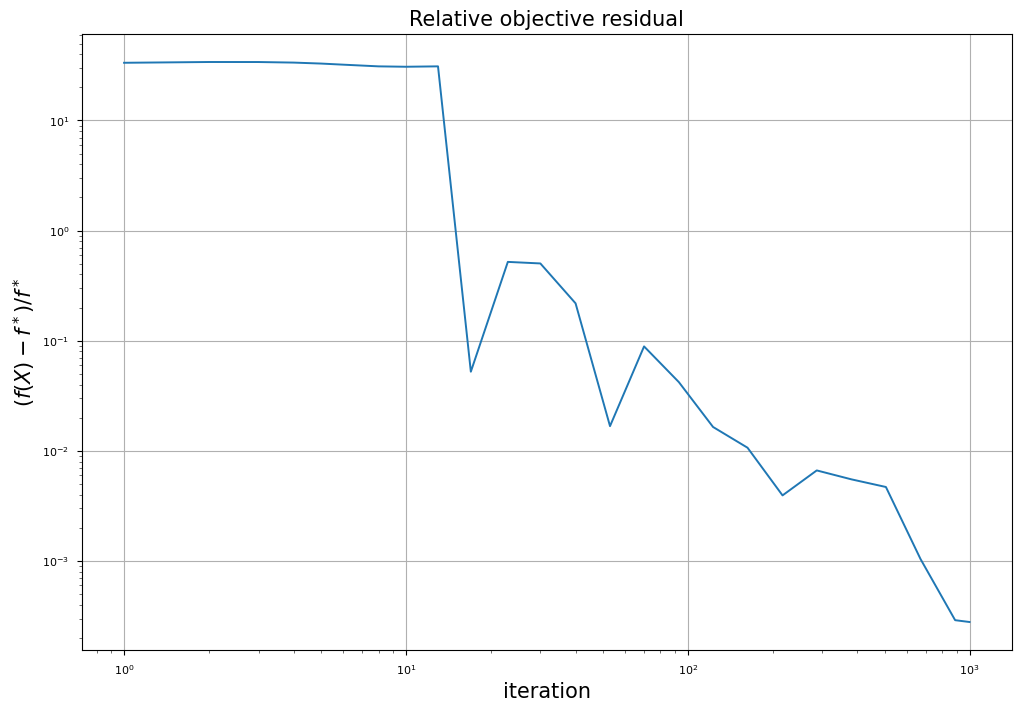

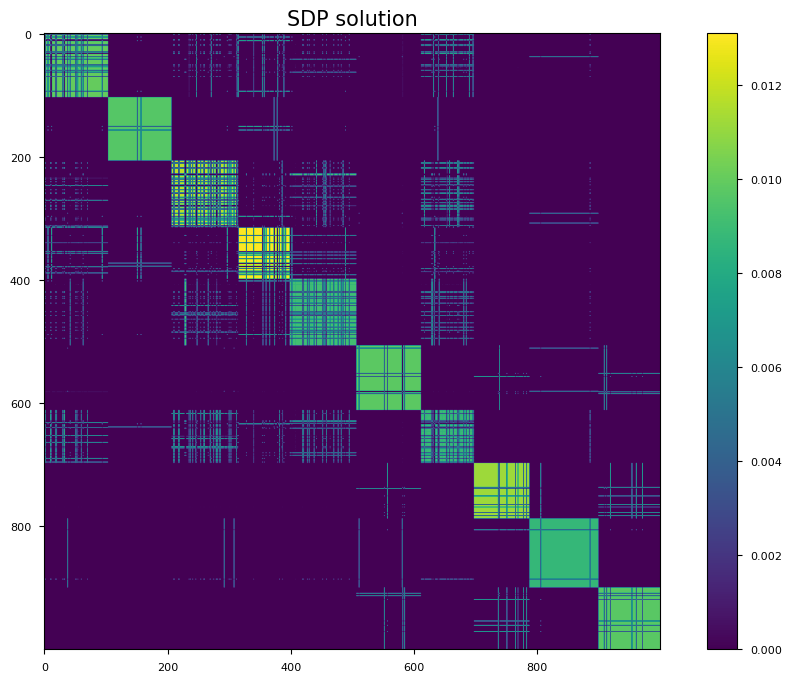

In [26]:
plot_func(iter_PDHG, f1_PDHG,f2_PDHG, obj_PDHG, X_PDHG, opt_val)

### Comparing HCGM and Vu-Condat

#### Question 2.2.6 (3 pt)

Plot the results with the function `plot_comp`. What are the final objective values? Are they below the optimal value provided to you in `opt_val`? If yes, explain the reason. Answer in the box below.

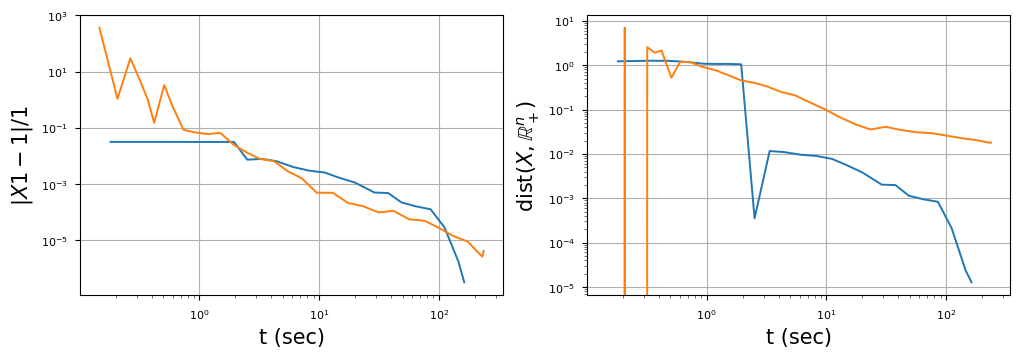

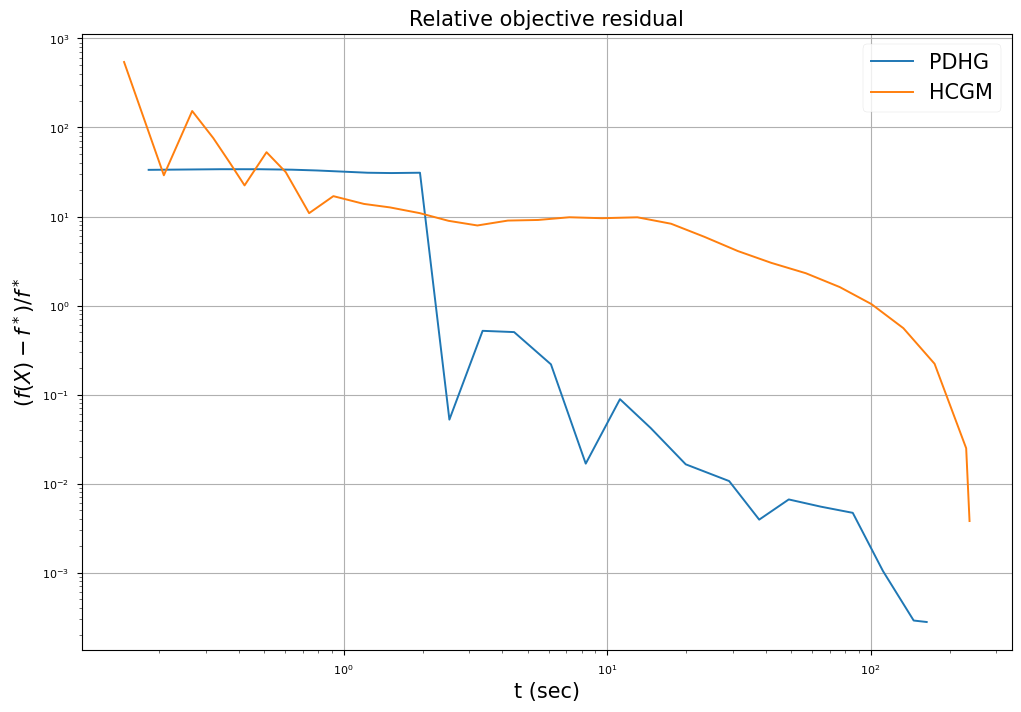

In [42]:
times = (time_PDHG, time_HCGM)
feas1 = (f1_PDHG, f1_HCGM)
feas2 = (f2_PDHG, f3_HCGM)
obj   = (obj_PDHG, obj_HCGM)
plot_comp(times, feas1,feas2, obj, opt_val)

In [43]:
print("Final objective values for Homotopy CGM algorithm = ", obj[1][-1] )
print("Final objective values for Vu-Condat algorithm = ", obj[0][-1] )
print("Provided optimal value = ", opt_val[0][0] )

Final objective values for Homotopy CGM algorithm =  56.836617336426464
Final objective values for Vu-Condat algorithm =  57.037474593217645
Provided optimal value =  57.053391868140864


<font color=‘blue’>
    
The final objective value for both algorithms are lower than the provided optimal value for the objective function. This is a contradication because it should not be possible to find a feasible solution that has a objective function value lesser than the opt_val. 

Explanation for these results.
    
HCGM - 
    
In this approach we relax the constraints by imposing them as soft constraints in the form of quadratic penalties in the objective function. This means that we consider all the feasible solutions and also non-feasible solutions for the original problem in the algorithm. So the final output is not gauranteed to be feasible meaning that it can have an objective function value lesser than opt_val.
    
Vu-Condat - 
    
This algorithm aims to solve the dual optimization problem thus approaches the optimal objective function from below, i.e. it has an objective function value always lesser than opt_val. Thus in this case it is not surprising that the final output objective function value is lesser than opt_val. 

In [60]:
# print objective values for Vu-Condat algorithm to show that it is always lower than opt_val
obj[0]

[-1850.3213763826284,
 -1881.5115085143361,
 -1880.626100260418,
 -1857.9503398600052,
 -1819.4040895247513,
 -1776.3444647673068,
 -1712.6617253472004,
 -1698.3701597511129,
 -1713.0749005643484,
 54.06809486888479,
 27.389851579280702,
 28.338460115295955,
 44.58363521359277,
 56.09704358067199,
 51.98837995688345,
 59.45615013178008,
 56.113634030560476,
 56.444236006914146,
 56.82865858207027,
 56.67453823245762,
 56.739076969761705,
 56.78550220908021,
 56.99398808105062,
 57.03685625764316,
 57.037474593217645]

#### Rounding: Get the assignments from the result of the SDP
Getting the assignments requires going back to the $10$ dimensional space discussed before, and using the coordinates multiplied with the obtained matrix to construct a "denoised" version of the data points. This allows then to find the clusters from these $10$ dimensional data. Our implementation is the python reimplementation of their matlab code which can be found on [github](https://github.com/solevillar/kmeans_sdp).

In [44]:
center_HCGM, assign_HCGM = sdp_rounding(X_HCGM,10, digits)
center_PDHG, assign_PDHG = sdp_rounding(X_PDHG,10, digits)

#### k-means value: HCGM & Vu-Condat

Using the function `value_kmeans`, run the cell below to obtain the $k$-means value before and after running both algorithms. 

    

In [45]:
k_means_before = value_kmeans(digits, labels-1) # k_means value with true labels
k_means_after_HCGM  = value_kmeans(digits, assign_HCGM) # k_means value with assigned lables
k_means_after_PDHG  = value_kmeans(digits, assign_PDHG) # k_means value with assigned lables

print('k-means value initial: {:.4f}'.format(k_means_before))
print('k-means value for HCGM: {:.4f}'.format(k_means_after_HCGM))
print('k-means value for Vu-Condat: {:.4f}'.format(k_means_after_PDHG))

k-means value initial: 150.9680
k-means value for HCGM: 28.7269
k-means value for Vu-Condat: 28.7269


#### Question 2.2.7 (3 pts) k-means value: Lloyd's algorithm

Run the function `kmeans` a few times and report the $k$-means value obtained by Llyod's algorithm. Compare it with the ones obtained by rounding the solution of convex methods `HCGM` and `PDHG`.  Comment on the result.

In [51]:
centers_Lloyd, classifications_Lloyd, k_means_Lloyd = kmeans(digits.T, 10)#k_means value with Lloyds k-means algorithm

print('k-means value for Lloyd''s algorithm: {:.4f}'.format(k_means_Lloyd))

k-means value for Lloyds algorithm: 161.1393


<font color=‘blue’>
    
The k-means value for Lloyd's algorithm is higher than the k-means value for both HCGM and Vu-condat algorithm. The k-means value for Lloyd's algorithmalso changes a lot when we run it multiple times, with the performance depending on the initialisation of the centroids, but majority of the times is higher than the k-means value for both HCGM and Vu-condat algorithm.
    
These results clearly show that HCGM and Vu Condat algorithm outperforms Lloyd's algorithm for the given datasets

## OPTIONAL: Additional results for clustering fMNIST Data

### Misclassification rates: HCGM & Vu-Condat


**Dataset:** We use the fashion-MNIST data in (Xiao et al. 2017) which is released as
a possible replacement for the MNIST handwritten digits . Each data
point is a 28x28 grayscale image, associated with a label from 10
classes. Classes
are labeled from 0 to 9. First, we extract the meaningful features from
this dataset using a simple 2 layers neural network with a sigmoid
activation. Then, we apply neural network to 1000 test samples from the
same dataset, which gives us a vector $\mu \in \mathbb{R}^{10}$ where
each entry represents the probability being in that class. Then, we form
the pairwise distance matrix $\boldsymbol{C}$ by using this probability
vectors (In the code, you do not need to worry about any of the processing
    details mentioned here. You are directly given the matrix
    $\mathbf{C}$.).

In [29]:
print('Misclassification rate for HCGM: {:.4f}'.format(misclassification_rate(assign_HCGM, labels)))
print('Misclassification rate for Vu-Condat: {:.4f}'.format(misclassification_rate(assign_PDHG, labels)))

Misclassification rate for HCGM: 0.1250
Misclassification rate for Vu-Condat: 0.1250


### Visualize samples and predicted labels

In [30]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [31]:
def vis_samples(assignment, images, labels):
    assignment=assignment.astype(int)
    classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    labels = labels-1
    rand_samp = np.random.randint(0,1000,25)
    plt.figure(figsize=(7,7))
    for i,samp in enumerate(rand_samp):
        plt.subplot(5,5,i+1)
        plt.imshow(1-np.reshape(images[samp],[28,28]), cmap=plt.cm.gray)
        plt.title('Pred. {0}\n Orig. {1}'.format(classes[assignment[samp].item()],classes[labels[samp].item()]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

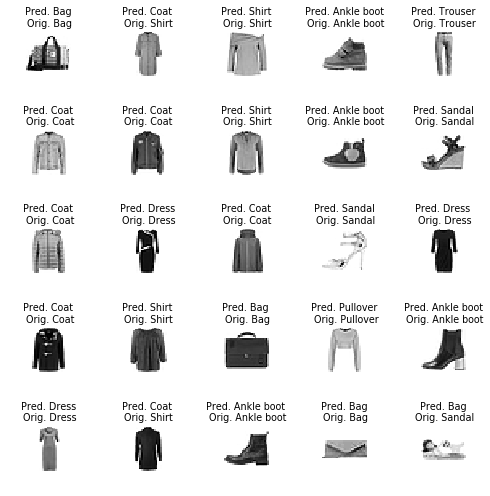

In [32]:
vis_samples(assign_HCGM, images,labels)

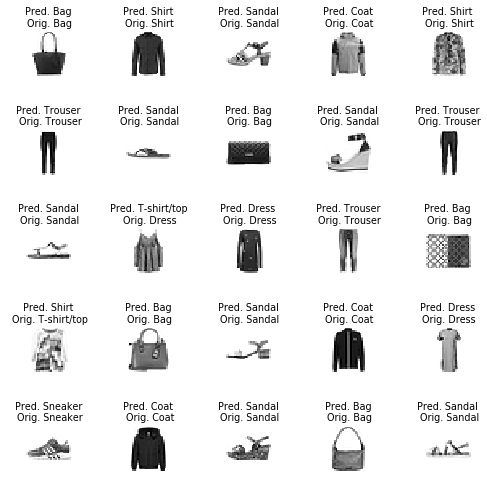

In [33]:
vis_samples(assign_PDHG, images,labels)

## References 

Xiao, Rasul & Vollgraf 2017,  Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

Peng & Wei 2007, Approximating K-means-type clustering via semidefinite programming

Yurtsever, Fercoq, Locatello & Cevher 2018, A Conditional Gradient Framework for Composite Convex Minimization with Applications to Semidefinite Programming